In [1]:
#Importing the important Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from fbprophet import Prophet
import pycountry
import plotly.express as px

Data Import,Preprocessing and EDA

In [2]:
#Importing the Data Import
df = pd.read_csv('/home/franc/Jupyter/Covid_19/novel-corona-virus-2019-dataset/covid_19_data.csv',parse_dates=['Last Update'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

df_confirmed = pd.read_csv("/home/franc/Jupyter/Covid_19/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv")
df_recovered = pd.read_csv("/home/franc/Jupyter/Covid_19/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv")
df_deaths = pd.read_csv("/home/franc/Jupyter/Covid_19/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv")

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [3]:
df_confirmed.head()

Province/State    Country      Lat      Long  1/22/20  1/23/20  1/24/20  \
0            NaN   Thailand  15.0000  101.0000        2        3        5   
1            NaN      Japan  36.0000  138.0000        2        1        2   
2            NaN  Singapore   1.2833  103.8333        0        1        3   
3            NaN      Nepal  28.1667   84.2500        0        0        0   
4            NaN   Malaysia   2.5000  112.5000        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  \
0        7        8        8  ...      47      48      50      50      50   
1        2        4        4  ...     360     420     461     502     511   
2        3        4        5  ...     117     130     138     150     150   
3        1        1        1  ...       1       1       1       1       1   
4        3        4        4  ...      50      83      93      99     117   

   3/10/20  3/11/20  3/12/20  3/13/20  3/14/20  
0       53       59       70       75       82  
1      581      639      639      701      773  
2      160      178      178      200      212  
3        1        1        1        1        1  
4      129      149      149      197      238  

[5 rows x 57 columns]

Earliest Cases

In [4]:
#Viewing the First few cases from the Data
df.head()

SNo        Date Province/State         Country         Last Update  \
0    1  01/22/2020          Anhui  Mainland China 2020-01-22 17:00:00   
1    2  01/22/2020        Beijing  Mainland China 2020-01-22 17:00:00   
2    3  01/22/2020      Chongqing  Mainland China 2020-01-22 17:00:00   
3    4  01/22/2020         Fujian  Mainland China 2020-01-22 17:00:00   
4    5  01/22/2020          Gansu  Mainland China 2020-01-22 17:00:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

Latest Cases

In [5]:
#Viewing the latest cases from the data
df.tail()

SNo        Date                Province/State  \
5885  5886  03/15/2020                     Gibraltar   
5886  5887  03/15/2020                           NaN   
5887  5888  03/15/2020  Diamond Princess cruise ship   
5888  5889  03/15/2020                 West Virginia   
5889  5890  03/15/2020                           NaN   

                             Country         Last Update  Confirmed  Deaths  \
5885                              UK 2020-03-14 16:33:03        1.0     0.0   
5886                      Uzbekistan 2020-03-15 18:20:19        1.0     0.0   
5887                       Australia 2020-03-14 02:33:04        0.0     0.0   
5888                              US 2020-03-10 02:33:04        0.0     0.0   
5889  occupied Palestinian territory 2020-03-11 20:53:02        0.0     0.0   

      Recovered  
5885        1.0  
5886        0.0  
5887        0.0  
5888        0.0  
5889        0.0

In [6]:
#Lets Create the new data set and group them by Variables(Date,Country,Province/State)
df2 = df.groupby(["Date", "Country", "Province/State"])[['SNo', 'Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

By country View(World)

In [7]:
df2

Date         Country Province/State   SNo  Confirmed  Deaths  \
0     01/22/2020       Hong Kong      Hong Kong    13        0.0     0.0   
1     01/22/2020           Macau          Macau    21        1.0     0.0   
2     01/22/2020  Mainland China          Anhui     1        1.0     0.0   
3     01/22/2020  Mainland China        Beijing     2       14.0     0.0   
4     01/22/2020  Mainland China      Chongqing     3        6.0     0.0   
...          ...             ...            ...   ...        ...     ...   
3566  03/15/2020              US       Virginia  5737       45.0     1.0   
3567  03/15/2020              US     Washington  5658      643.0    40.0   
3568  03/15/2020              US  West Virginia  5889        0.0     0.0   
3569  03/15/2020              US      Wisconsin  5757       32.0     0.0   
3570  03/15/2020              US        Wyoming  5832        3.0     0.0   

      Recovered  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
...         ...  
3566        0.0  
3567        1.0  
3568        0.0  
3569        1.0  
3570        0.0  

[3571 rows x 7 columns]

By Country view(China)

In [8]:
#Viewing only th cases in China
df.query('Country=="Mainland China"').groupby("Last Update")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

Last Update  Confirmed  Deaths  Recovered
0   2020-01-22 17:00:00      547.0    17.0       28.0
1   2020-01-23 17:00:00      639.0    18.0       30.0
2   2020-01-24 17:00:00      916.0    26.0       36.0
3   2020-01-25 17:00:00     1399.0    42.0       39.0
4   2020-01-26 16:00:00     2062.0    56.0       49.0
..                  ...        ...     ...        ...
729 2020-03-15 01:33:02     1231.0     1.0     1211.0
730 2020-03-15 01:53:02      631.0     0.0      631.0
731 2020-03-15 03:53:04      576.0     6.0      570.0
732 2020-03-15 04:13:27      125.0     1.0      114.0
733 2020-03-15 18:20:18    69962.0  3101.0    56332.0

[734 rows x 4 columns]

By Country(Sorted)

In [9]:

#Viewing the rest of the World
df.groupby("Country")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

Country  Confirmed  Deaths  Recovered
0                        Azerbaijan        1.0     0.0        0.0
1                   ('St. Martin',)        2.0     0.0        0.0
2                       Afghanistan       74.0     0.0        0.0
3                           Albania      160.0     5.0        0.0
4                           Algeria      286.0    10.0       40.0
..                              ...        ...     ...        ...
156                      Uzbekistan        1.0     0.0        0.0
157                    Vatican City        4.0     0.0        0.0
158                       Venezuela       12.0     0.0        0.0
159                         Vietnam      854.0     0.0      454.0
160  occupied Palestinian territory       25.0     0.0        0.0

[161 rows x 4 columns]

VISUALIZATIONS

In [10]:
df.groupby('Date').sum()

SNo  Confirmed  Deaths  Recovered
Date                                             
01/22/2020      741      555.0    17.0       28.0
01/23/2020     2829      653.0    18.0       30.0
01/24/2020     4305      941.0    26.0       36.0
01/25/2020     6490     1438.0    42.0       39.0
01/26/2020     9071     2118.0    56.0       52.0
01/27/2020    12342     2927.0    82.0       61.0
01/28/2020    15262     5578.0   131.0      107.0
01/29/2020    18711     6165.0   133.0      126.0
01/30/2020    23345     8235.0   171.0      143.0
01/31/2020    28675     9925.0   213.0      222.0
02/01/2020    35309    12038.0   259.0      284.0
02/02/2020    39798    16787.0   362.0      472.0
02/03/2020    44982    19881.0   426.0      623.0
02/04/2020    51135    23892.0   492.0      852.0
02/05/2020    56871    27636.0   564.0     1124.0
02/06/2020    61912    30818.0   634.0     1487.0
02/07/2020    67932    34392.0   719.0     2011.0
02/08/2020    73116    37121.0   806.0     2616.0
02/09/2020    78300    40151.0   906.0     3244.0
02/10/2020    83484    42763.0  1013.0     3946.0
02/11/2020    89936    44803.0  1113.0     4683.0
02/12/2020    95265    45222.0  1118.0     5150.0
02/13/2020   102009    60370.0  1371.0     6295.0
02/14/2020   108975    66887.0  1523.0     8058.0
02/15/2020   114600    69032.0  1666.0     9395.0
02/16/2020   120225    71226.0  1770.0    10865.0
02/17/2020   125850    73260.0  1868.0    12583.0
02/18/2020   131475    75138.0  2007.0    14352.0
02/19/2020   138966    75641.0  2122.0    16121.0
02/20/2020   144742    76199.0  2247.0    18177.0
02/21/2020   166698    76843.0  2251.0    18890.0
02/22/2020   173754    78599.0  2458.0    22886.0
02/23/2020   183005    78985.0  2469.0    23394.0
02/24/2020   201645    79570.0  2629.0    25227.0
02/25/2020   219255    80415.0  2708.0    27905.0
02/26/2020   245430    81397.0  2770.0    30384.0
02/27/2020   265965    82756.0  2814.0    33277.0
02/28/2020   301245    84124.0  2872.0    36711.0
02/29/2020   328321    86013.0  2941.0    39782.0
03/01/2020   360125    88371.0  2996.0    42716.0
03/02/2020   424974    90309.0  3085.0    45602.0
03/03/2020   477160    92844.0  3160.0    48229.0
03/04/2020   530480    95124.0  3254.0    51171.0
03/05/2020   602386    97886.0  3348.0    53797.0
03/06/2020   729932   101800.0  3460.0    55866.0
03/07/2020   873000   105836.0  3558.0    58359.0
03/08/2020  1050600   109835.0  3803.0    60695.0
03/09/2020  1165213   113582.0  3996.0    62512.0
03/10/2020   950999   118582.0  4262.0    64404.0
03/11/2020  1042740   125865.0  4615.0    67003.0
03/12/2020  1099701   128343.0  4720.0    68324.0
03/13/2020  1211755   145193.0  5404.0    70251.0
03/14/2020  1371492   156099.0  5819.0    72624.0
03/15/2020  1486467   167447.0  6440.0    76034.0

Summary Plot of WorldWide Cases-Confirmed,Deaths and Recovered

In [11]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered =df.groupby('Date').sum()['Recovered'].reset_index()

In [12]:
fig = go.Figure()
fig.add_trace(go.Bar(x=confirmed['Date'],
                y=confirmed['Confirmed'],
                name='Confirmed',
                marker_color='blue'
                ))
fig.add_trace(go.Bar(x=deaths['Date'],
                y=deaths['Deaths'],
                name='Deaths',
                marker_color='Red'
                ))
fig.add_trace(go.Bar(x=recovered['Date'],
                y=recovered['Recovered'],
                name='Recovered',
                marker_color='Green'
                ))

fig.update_layout(
    title='Worldwide Corona Virus Cases - Confirmed, Deaths, Recovered (Bar Chart)',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

In [13]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'], 
                         y=confirmed['Confirmed'],
                         mode='lines+markers',
                         name='Confirmed',
                         line=dict(color='blue', width=2)
                        ))
fig.add_trace(go.Scatter(x=deaths['Date'], 
                         y=deaths['Deaths'],
                         mode='lines+markers',
                         name='Deaths',
                         line=dict(color='Red', width=2)
                        ))
fig.add_trace(go.Scatter(x=recovered['Date'], 
                         y=recovered['Recovered'],
                         mode='lines+markers',
                         name='Recovered',
                         line=dict(color='Green', width=2)
                        ))
fig.update_layout(
    title='Worldwide Corona Virus Cases - Confirmed, Deaths, Recovered (Line Chart)',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    )
)
fig.show()

In [14]:
df_confirmed = df_confirmed[["Province/State","Lat","Long","Country"]]
df_latlong = pd.merge(df, df_confirmed, on=["Province/State" ,"Country"])

fig = px.density_mapbox(df_latlong, 
                        lat="Lat", 
                        lon="Long", 
                        hover_name="Province/State", 
                        hover_data=["Confirmed","Deaths","Recovered"], 
                        animation_frame="Date",
                        color_continuous_scale="Portland",
                        radius=7, 
                        zoom=0,height=700)
fig.update_layout(title='Worldwide Corona Virus Cases Time Lapse - Confirmed, Deaths, Recovered',
                  font=dict(family="Courier New, monospace",
                            size=18,
                            color="#7f7f7f")
                 )
fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})


fig.show()

Analysis By Country

Latest Date in Data

In [15]:
confirmed = df2.groupby(['Date', 'Country']).sum()[['Confirmed']].reset_index()
deaths = df2.groupby(['Date', 'Country']).sum()[['Deaths']].reset_index()
recovered = df2.groupby(['Date', 'Country']).sum()[['Recovered']].reset_index()

In [16]:
latest_date = confirmed['Date'].max()
latest_date

'03/15/2020'

In [17]:
confirmed = confirmed[(confirmed['Date']==latest_date)][['Country', 'Confirmed']]
deaths = deaths[(deaths['Date']==latest_date)][['Country', 'Deaths']]
recovered = recovered[(recovered['Date']==latest_date)][['Country', 'Recovered']]

Countries?Regions Affected

In [18]:
all_countries = confirmed['Country'].unique()
print("Number of countries/regions with cases: " + str(len(all_countries)))
print("Countries/Regions with cases: ")
for i in all_countries:
    print("    " + str(i))

Number of countries/regions with cases: 10
Countries/Regions with cases: 
    Australia
    Canada
    Denmark
    France
    Hong Kong
    Macau
    Mainland China
    Others
    UK
    US


In [19]:
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3
    
confirmed["iso_alpha"] = confirmed["Country"].map(countries.get)
deaths["iso_alpha"] = deaths["Country"].map(countries.get)
recovered["iso_alpha"] = recovered["Country"].map(countries.get)

In [20]:
plot_data_confirmed = confirmed[["iso_alpha","Confirmed", "Country"]]
plot_data_deaths = deaths[["iso_alpha","Deaths"]]
plot_data_recovered = recovered[["iso_alpha","Recovered"]]

In [21]:
fig = px.scatter_geo(plot_data_confirmed, locations="iso_alpha", color="Country",
                     hover_name="iso_alpha", size="Confirmed",
                     projection="natural earth", title = 'Worldwide Confirmed Cases')
fig.show()

In [22]:
fig = px.scatter_geo(plot_data_deaths, locations="iso_alpha", color="Deaths",
                     hover_name="iso_alpha", size="Deaths",
                     projection="natural earth", title="Worldwide Death Cases")
fig.show()

In [23]:
fig = px.scatter_geo(plot_data_recovered, locations="iso_alpha", color="Recovered",
                     hover_name="iso_alpha", size="Recovered",
                     projection="natural earth", title="Worldwide Recovered Cases")
fig.show()

Transforming Data for Forecasting

In [24]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [25]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [26]:
confirmed.head()

ds       y
0 2020-01-22   555.0
1 2020-01-23   653.0
2 2020-01-24   941.0
3 2020-01-25  1438.0
4 2020-01-26  2118.0

Forecasting Total Number of Cases world Wide with Prophet(Baseline)



We perform a week's ahead forecast with Propher,wih 95% prediction iontervals.Here no tweaking of seasonality-related parameters and additional regressors are performed.

In [27]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future_confirmed = future.copy() # for non-baseline predictions later on
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
56 2020-03-18
57 2020-03-19
58 2020-03-20
59 2020-03-21
60 2020-03-22

In [28]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds           yhat     yhat_lower     yhat_upper
56 2020-03-18  148703.893313  134359.669591  164074.564874
57 2020-03-19  152585.478705  136856.270726  168784.397535
58 2020-03-20  157365.812683  142052.981500  172200.101727
59 2020-03-21  161049.269158  146979.712257  175134.183422
60 2020-03-22  165066.852886  149432.917073  179178.663696

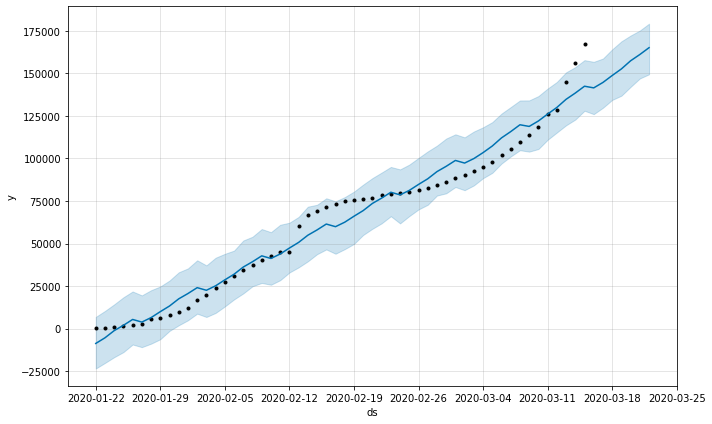

In [29]:
confirmed_forecast_plot = m.plot(forecast)

Forecasting Deaths WorldWide with Prophet(Baseline)

We perform a week's ahead forecast with prophet,with 95% prediction intervals.Here,No tweaking of seaonality-related parameters 
and additional regressors are perfomed.

In [30]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [31]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future_deaths = future.copy() # for non-baseline predictions later on
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
56 2020-03-18
57 2020-03-19
58 2020-03-20
59 2020-03-21
60 2020-03-22

In [32]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
56 2020-03-18  6138.425635  5723.571734  6523.008821
57 2020-03-19  6317.279493  5896.446582  6730.520233
58 2020-03-20  6547.994480  6158.866820  6961.812432
59 2020-03-21  6770.709480  6338.891684  7190.660337
60 2020-03-22  7011.341739  6600.761946  7414.461343

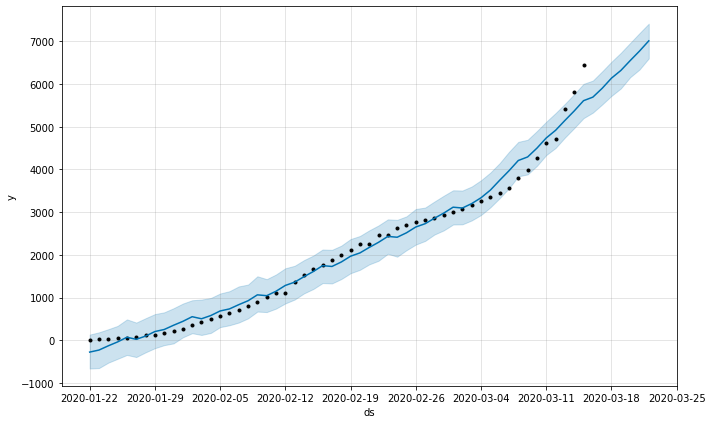

In [33]:
deaths_forecast_plot = m.plot(forecast)

Forecasting Recovered Cases WorldWide with Prophet(Baseline)

We perform a week's ahead forecast with prophet,with 95% prediction intervals.Here,No tweaking of seaonality-related parameters and additional regressors are perfomed.

In [34]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [35]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=7)
future_recovered = future.copy() # for non-baseline predictions later on
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
56 2020-03-18
57 2020-03-19
58 2020-03-20
59 2020-03-21
60 2020-03-22

In [36]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
56 2020-03-18  81659.035412  80539.801511  82694.091964
57 2020-03-19  83815.186443  82061.605669  85383.444446
58 2020-03-20  85921.056740  83448.671497  87912.861717
59 2020-03-21  88454.886550  85268.627032  91028.290628
60 2020-03-22  90626.029576  86879.850327  93988.136907

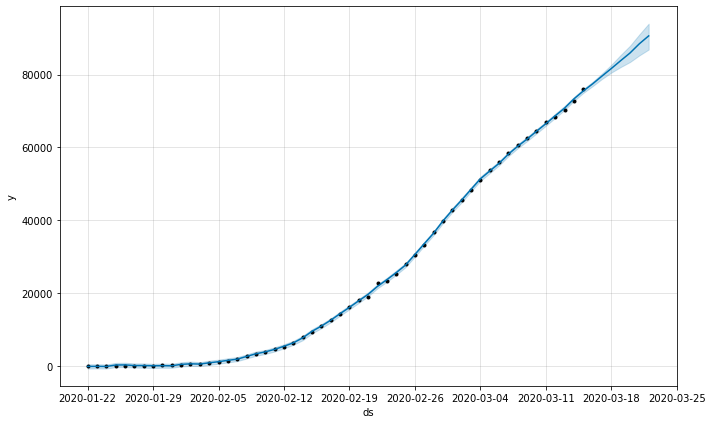

In [37]:
recovered_forecast_plot = m.plot(forecast)

(FINAL) Forecasting Confirmed, Death & Recovered Cases Worldwide with Prophet (by Country/Region & Province/State)

Data Preparation

As we are now forecasting at country and state/province level, for small values, it is possible for forecasts to become negative. To counter this, we round negative values to zero.

In [38]:
days_to_forecast = 7 # changable

In [39]:
confirmed_df = df2[['SNo', 'Date','Province/State', 'Country', 'Confirmed']]
confirmed_df

SNo        Date Province/State         Country  Confirmed
0       13  01/22/2020      Hong Kong       Hong Kong        0.0
1       21  01/22/2020          Macau           Macau        1.0
2        1  01/22/2020          Anhui  Mainland China        1.0
3        2  01/22/2020        Beijing  Mainland China       14.0
4        3  01/22/2020      Chongqing  Mainland China        6.0
...    ...         ...            ...             ...        ...
3566  5737  03/15/2020       Virginia              US       45.0
3567  5658  03/15/2020     Washington              US      643.0
3568  5889  03/15/2020  West Virginia              US        0.0
3569  5757  03/15/2020      Wisconsin              US       32.0
3570  5832  03/15/2020        Wyoming              US        3.0

[3571 rows x 5 columns]

In [40]:
deaths_df = df2[['SNo', 'Date','Province/State', 'Country', 'Deaths']]
deaths_df

SNo        Date Province/State         Country  Deaths
0       13  01/22/2020      Hong Kong       Hong Kong     0.0
1       21  01/22/2020          Macau           Macau     0.0
2        1  01/22/2020          Anhui  Mainland China     0.0
3        2  01/22/2020        Beijing  Mainland China     0.0
4        3  01/22/2020      Chongqing  Mainland China     0.0
...    ...         ...            ...             ...     ...
3566  5737  03/15/2020       Virginia              US     1.0
3567  5658  03/15/2020     Washington              US    40.0
3568  5889  03/15/2020  West Virginia              US     0.0
3569  5757  03/15/2020      Wisconsin              US     0.0
3570  5832  03/15/2020        Wyoming              US     0.0

[3571 rows x 5 columns]

In [41]:
recovered_df = df2[['SNo', 'Date','Province/State', 'Country', 'Recovered']]
recovered_df

SNo        Date Province/State         Country  Recovered
0       13  01/22/2020      Hong Kong       Hong Kong        0.0
1       21  01/22/2020          Macau           Macau        0.0
2        1  01/22/2020          Anhui  Mainland China        0.0
3        2  01/22/2020        Beijing  Mainland China        0.0
4        3  01/22/2020      Chongqing  Mainland China        0.0
...    ...         ...            ...             ...        ...
3566  5737  03/15/2020       Virginia              US        0.0
3567  5658  03/15/2020     Washington              US        1.0
3568  5889  03/15/2020  West Virginia              US        0.0
3569  5757  03/15/2020      Wisconsin              US        1.0
3570  5832  03/15/2020        Wyoming              US        0.0

[3571 rows x 5 columns]

Forecasting Confirmed Cases, Deaths & Recovered Cases

Next, we perform predictions for each country and state.

In [42]:
forecast_dfs = []
for country in all_countries:
    try:
        assert(country in confirmed_df['Country'].values)
        print('Country ' + str(country) + ' is listed! ')
        country_confirmed_df = confirmed_df[(confirmed_df['Country'] == country)]
        country_deaths_df = deaths_df[(deaths_df['Country'] == country)]
        country_recovered_df = recovered_df[(recovered_df['Country'] == country)]
        country_dfs = [('Confirmed', country_confirmed_df), 
                       ('Deaths', country_deaths_df), 
                       ('Recovered', country_recovered_df)]
        states_in_country = country_confirmed_df['Province/State'].unique()
        for state in states_in_country:
            try:
                state_dfs = [] # to store forecasts for Confirmed, Deaths and Recovered
                
                assert(state in country_confirmed_df['Province/State'].values)
                
                # make forecasts for each case type (Confirmed, Deaths, Recovered)
                for country_df_tup in country_dfs:
                    case_type = country_df_tup[0]
                    country_df = country_df_tup[1]
                    state_df = country_df[(country_df['Province/State'] == state)]

                    # data preparation for forecast with Prophet at state level
                    state_df = state_df[['Date', case_type]]
                    state_df.columns = ['ds','y']
                    state_df['ds'] = pd.to_datetime(state_df['ds'])
                    m = Prophet()
                    m.fit(state_df)
                    future = m.make_future_dataframe(periods=days_to_forecast)
                    forecast = m.predict(future)
                    #forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

                    # save results to dataframe
                    forecast_df = forecast[['ds', 'yhat']]
                    forecast_df['Province/State'] = state
                    forecast_df['Country/Region'] = country
                    forecast_df.rename(columns={'yhat':case_type}, inplace=True)
                    state_dfs += [forecast_df.tail(days_to_forecast)]
                
                merged_df = state_dfs[0].merge(state_dfs[1],on=['ds', 'Province/State', 'Country/Region']).merge(state_dfs[2],on=['ds', 'Province/State', 'Country/Region'])
                forecast_dfs += [merged_df]
            except:
                continue
    except:
        print('Country ' + str(country) + ' is not listed! ')
        continue

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Country Australia is listed! 


/home/franc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/franc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/franc/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_chang

Country Canada is listed! 


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabli

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disab

Country Denmark is listed! 


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disab

Country France is listed! 


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disab

Country Hong Kong is listed! 


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Country Macau is listed! 


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Country Mainland China is listed! 


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

Country Others is listed! 


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabli

Country UK is listed! 


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disab

Country US is listed! 


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seaso

INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_chang

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:Disabling yearly seasonality. Run p

INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_chang

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:Disabling yearly seasonality. Run p

INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_chang

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:Disabling yearly seasonality. Run p

INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_chang

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:Disabling yearly seasonality. Run p

INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_chang

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run p

INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_chang

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run p

INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_chang

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run p

INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run

In [43]:
forecast_dfs[0].tail(days_to_forecast) # example of a forecast

ds  Confirmed   Province/State Country/Region    Deaths  Recovered
0 2020-03-16  48.972888  New South Wales      Australia  1.635300   4.773620
1 2020-03-17  50.973202  New South Wales      Australia  1.493250   4.773493
2 2020-03-18  53.687810  New South Wales      Australia  1.635734   4.773375
3 2020-03-19  53.687641  New South Wales      Australia  1.635948   5.344692
4 2020-03-20  58.116463  New South Wales      Australia  1.636164   5.344589
5 2020-03-21  61.259183  New South Wales      Australia  1.636383   5.344490
6 2020-03-22  66.116349  New South Wales      Australia  1.921132   5.344392

Some Final Touch-ups..

In [44]:
forecasts_final = pd.concat(forecast_dfs, axis=0)
forecasts_final.sort_values(by='ds')
forecasts_final = forecasts_final[['ds', 'Province/State', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']]
forecasts_final.rename(columns={'ds':'ObservationDate'}, inplace=True)
for case_type in ['Confirmed', 'Deaths', 'Recovered']:
    forecasts_final[case_type] = forecasts_final[case_type].round() # round forecasts to integer as humans cannot be floats
    forecasts_final[forecasts_final[case_type] < 0] = 0 # replace negative forecasts to zero
    
forecasts_final

ObservationDate        Province/State Country/Region  Confirmed  \
0   2020-03-16 00:00:00       New South Wales      Australia       49.0   
1   2020-03-17 00:00:00       New South Wales      Australia       51.0   
2   2020-03-18 00:00:00       New South Wales      Australia       54.0   
3   2020-03-19 00:00:00       New South Wales      Australia       54.0   
4   2020-03-20 00:00:00       New South Wales      Australia       58.0   
..                  ...                   ...            ...        ...   
2   2020-03-18 00:00:00  Virgin Islands, U.S.             US        1.0   
3   2020-03-19 00:00:00  Virgin Islands, U.S.             US        1.0   
4   2020-03-20 00:00:00  Virgin Islands, U.S.             US        1.0   
5   2020-03-21 00:00:00  Virgin Islands, U.S.             US        1.0   
6   2020-03-22 00:00:00  Virgin Islands, U.S.             US        1.0   

    Deaths  Recovered  
0      2.0        5.0  
1      1.0        5.0  
2      2.0        5.0  
3      2.0        5.0  
4      2.0        5.0  
..     ...        ...  
2      0.0        0.0  
3      0.0        0.0  
4      0.0        0.0  
5      0.0        0.0  
6      0.0        0.0  

[1673 rows x 6 columns]

In [45]:
forecasts_final.to_csv("forecasts.csv", index=False) # save forecasts to CSV